**Introducing a groundbreaking dataset that pushes the boundaries of artificial intelligence in image generation – "AI-Generated Diversity: A Dataset of Synthetic Human Portraits." This collection comprises 140 high-quality images meticulously crafted by advanced AI algorithms, with 70 distinct female and 70 male portraits.**

**Explore the fascinating realm where technology meets creativity as our AI model captures the essence of human diversity, presenting a wide spectrum of facial features, expressions, and styles. Each image in this dataset is a testament to the remarkable capabilities of AI in mimicking the intricacies of human appearance.**

**Dive into a world where gender diversity is celebrated through the lens of artificial intelligence. Whether you're a researcher, developer, or enthusiast, this dataset provides a valuable resource for exploring the potential of AI-generated images and the nuances of human representation in virtual environments.**

**As technology continues to advance, this dataset serves as a glimpse into the future of AI-driven creativity and the exciting possibilities it holds for diverse and inclusive visual content.**

![](https://img.freepik.com/premium-photo/large-mixed-group-multicultural-people-international-students-friends-ai-generated-diversity-concept_650503-1847.jpg)


# Import necessary libraries 💼

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=685823c049d65f01c00457b9c94893b60d10235da7e62ce359aeeee92cbdd9fa
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

from deepface import DeepFace

from transformers import BlipProcessor, BlipForConditionalGeneration

2024-02-08 00:06:47.048093: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 00:06:47.048222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 00:06:47.327848: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


24-02-08 00:07:04 - Directory /root/.deepface created
24-02-08 00:07:04 - Directory /root/.deepface/weights created


# Dataset Exploration 📸

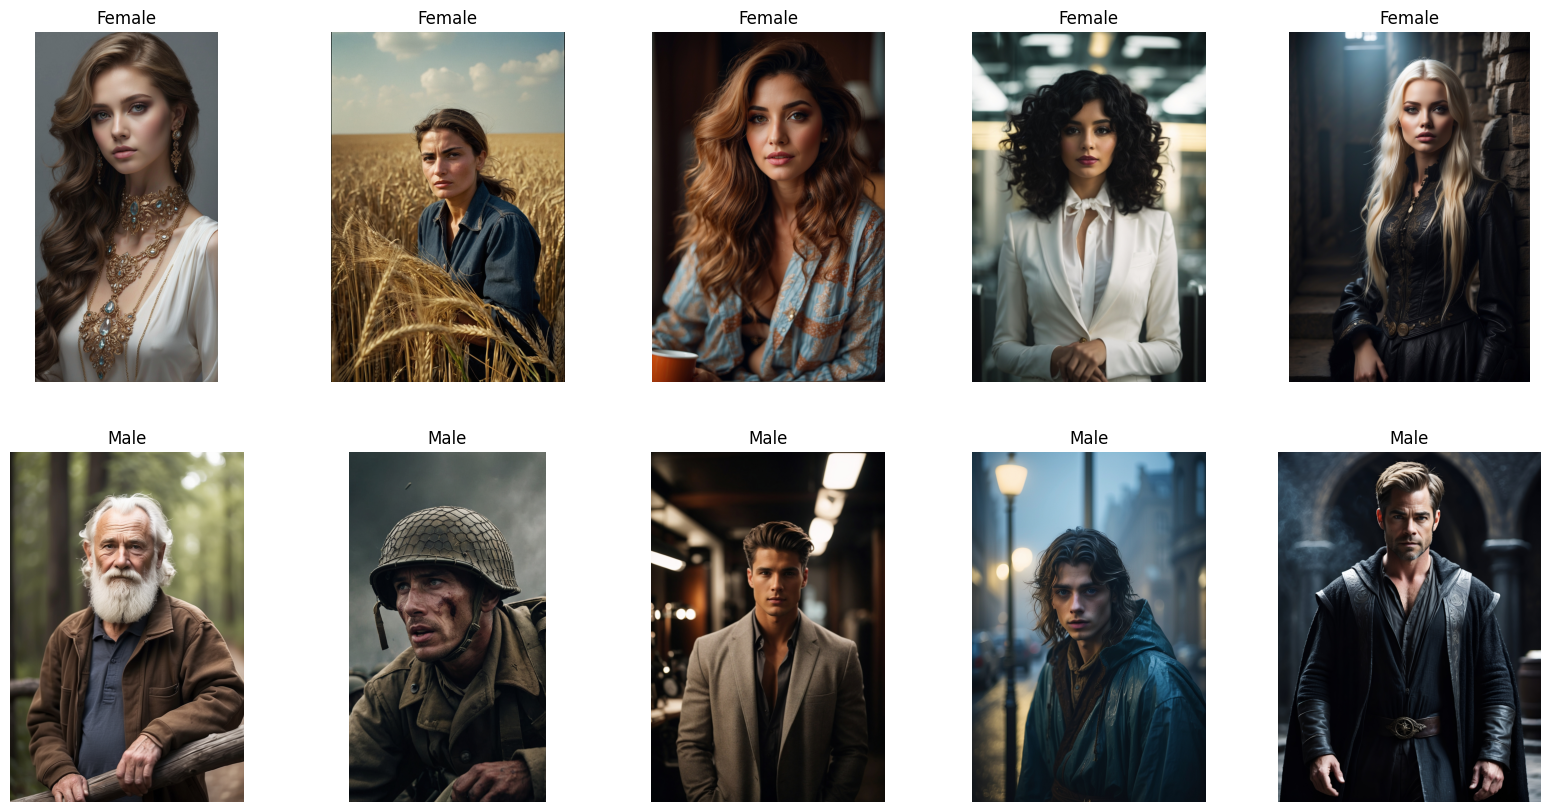

In [3]:
# Specify the paths to the directories containing images
female_directory = "/kaggle/input/ai-male-and-female/AI (Males & Females)/Female"
male_directory = "/kaggle/input/ai-male-and-female/AI (Males & Females)/Male"

# Function to load a specified number of randomly selected images from a directory
def load_random_images_from_directory(directory_path, num_images=5):
    all_images = os.listdir(directory_path)
    selected_images = random.sample(all_images, min(num_images, len(all_images)))
    
    images = []
    for filename in selected_images:
        if filename.endswith(".jpg"):
            image_path = os.path.join(directory_path, filename)
            img = Image.open(image_path)
            images.append(img)
    return images

# Load 5 random images from the female directory
female_images = load_random_images_from_directory(female_directory, num_images=5)

# Load 5 random images from the male directory
male_images = load_random_images_from_directory(male_directory, num_images=5)

# Display the 5 random female and 5 random male images
fig, axes = plt.subplots(2, 5, figsize=(20,10))

# Display random female images
for i, img in enumerate(female_images):
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title('Female')

# Display random male images
for i, img in enumerate(male_images):
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title('Male')

plt.show()

# Facial Expression Recognition 🤖👀

1/1 [==============================] - 0s 23ms/step


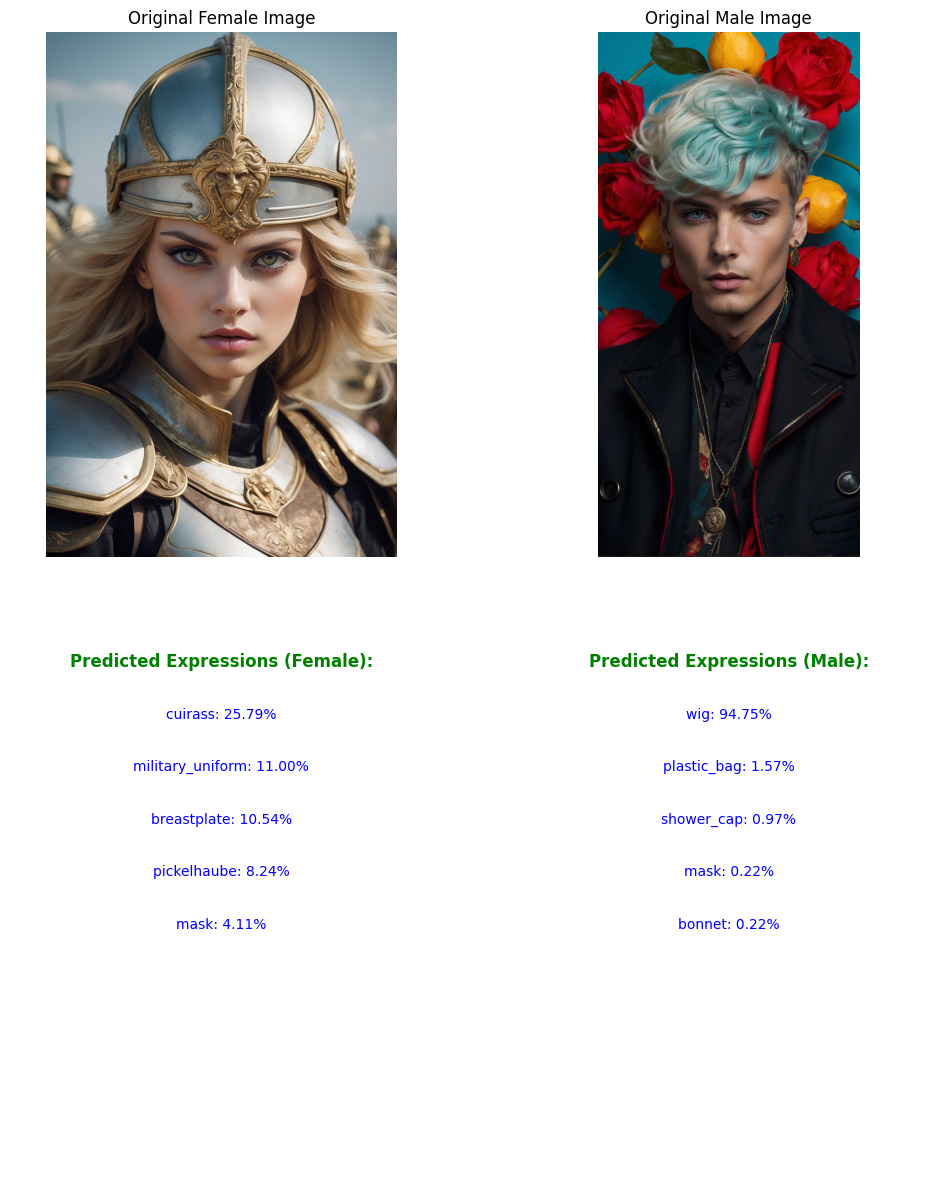

In [4]:
# Load a pre-trained MobileNetV2 model for facial expression recognition
model = MobileNetV2(weights='imagenet')

# Function to classify facial expressions in an image
def classify_facial_expression(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)

    # Get all predicted expressions and confidence scores
    predictions_list = [(prediction[1], prediction[2]) for prediction in decoded_predictions[0]]

    return predictions_list

# Specify the paths to the directories containing images
female_directory = "/kaggle/input/ai-male-and-female/AI (Males & Females)/Female"
male_directory = "/kaggle/input/ai-male-and-female/AI (Males & Females)/Male"

# List all image files in the female directory
female_image_files = [file for file in os.listdir(female_directory) if file.endswith(".jpg")]

# Select a random female image from the dataset
selected_female_image = np.random.choice(female_image_files)

# Display the original female image
female_image_path = os.path.join(female_directory, selected_female_image)
original_female_image = cv2.imread(female_image_path)

# Get all predicted expressions for the female image
predictions_female = classify_facial_expression(female_image_path)

# List all image files in the male directory
male_image_files = [file for file in os.listdir(male_directory) if file.endswith(".jpg")]

# Select a random male image from the dataset
selected_male_image = np.random.choice(male_image_files)

# Display the original male image
male_image_path = os.path.join(male_directory, selected_male_image)
original_male_image = cv2.imread(male_image_path)

# Get all predicted expressions for the male image
predictions_male = classify_facial_expression(male_image_path)

# Display images side by side with predictions below
fig, axs = plt.subplots(2, 2, figsize=(12, 15))

# Display the original female image
axs[0, 0].imshow(cv2.cvtColor(original_female_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Female Image')
axs[0, 0].axis('off')

# Display all predicted expressions for the female image
axs[1, 0].text(0.5, 1, 'Predicted Expressions (Female):', ha='center', va='center', fontsize=12, color='green', fontweight='bold')
for i, (expression, confidence) in enumerate(predictions_female):
    axs[1, 0].text(0.5, 0.9 - i * 0.1, f'{expression}: {confidence:.2%}', ha='center', va='center', fontsize=10, color='blue')
axs[1, 0].axis('off')

# Display the original male image
axs[0, 1].imshow(cv2.cvtColor(original_male_image, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Original Male Image')
axs[0, 1].axis('off')

# Display all predicted expressions for the male image
axs[1, 1].text(0.5, 1, 'Predicted Expressions (Male):', ha='center', va='center', fontsize=12, color='green', fontweight='bold')
for i, (expression, confidence) in enumerate(predictions_male):
    axs[1, 1].text(0.5, 0.9 - i * 0.1, f'{expression}: {confidence:.2%}', ha='center', va='center', fontsize=10, color='blue')
axs[1, 1].axis('off')

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.2)

plt.show()

# Emotion Detection 💻🤔

24-02-08 00:07:26 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 66.7MB/s]


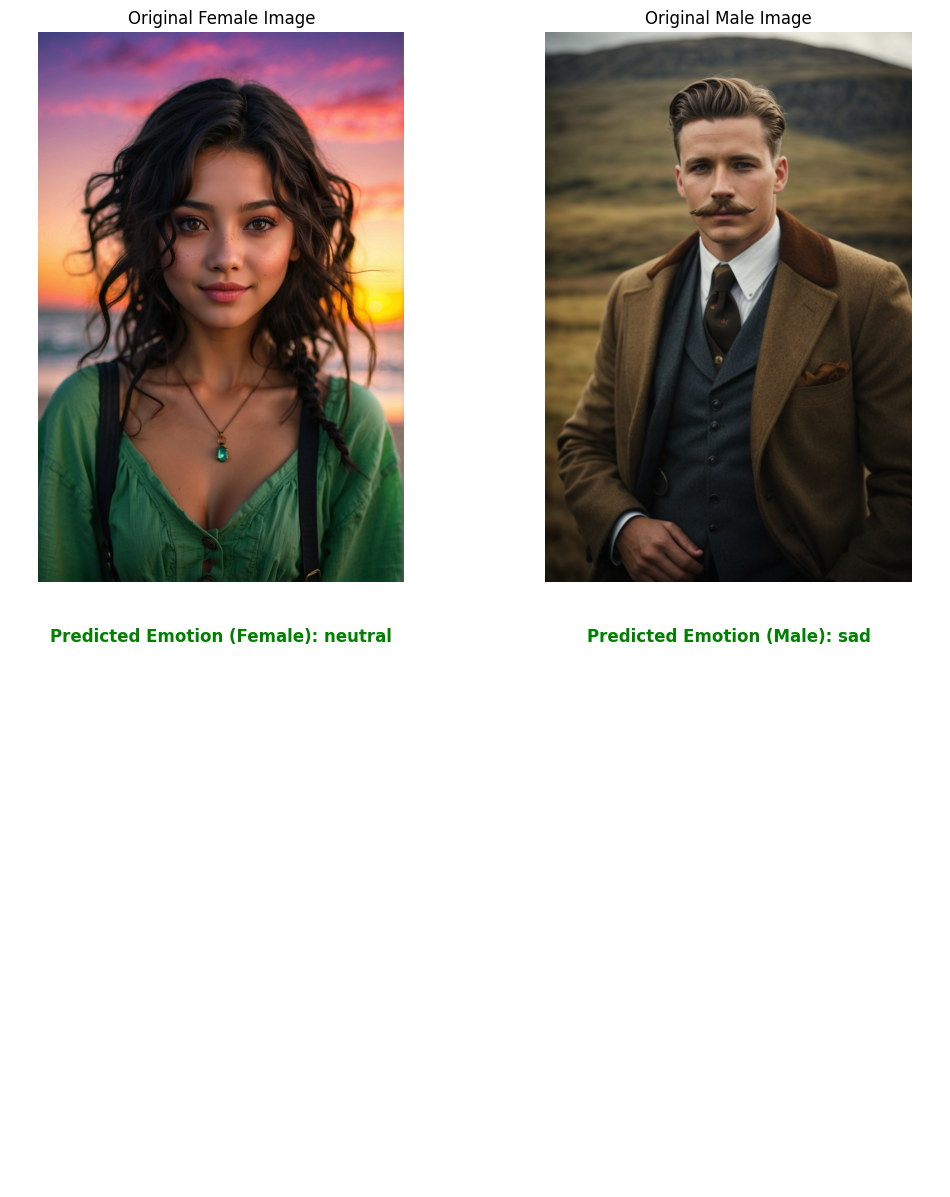

In [5]:
# Function to perform emotion detection using deepface
def detect_emotion(image_path):
    result = DeepFace.analyze(image_path, actions=['emotion'])
    emotions = result[0]['emotion']
    max_emotion = max(emotions, key=emotions.get)
    return max_emotion

# Specify the paths to the directories containing images
female_directory = "/kaggle/input/ai-male-and-female/AI (Males & Females)/Female"
male_directory = "/kaggle/input/ai-male-and-female/AI (Males & Females)/Male"

# List all image files in the female directory
female_image_files = [file for file in os.listdir(female_directory) if file.endswith(".jpg")]

# Select a random female image from the dataset
selected_female_image = np.random.choice(female_image_files)

# Display the original female image
female_image_path = os.path.join(female_directory, selected_female_image)
original_female_image = cv2.imread(female_image_path)

# Perform emotion detection for the female image
emotion_female = detect_emotion(female_image_path)

# List all image files in the male directory
male_image_files = [file for file in os.listdir(male_directory) if file.endswith(".jpg")]

# Select a random male image from the dataset
selected_male_image = np.random.choice(male_image_files)

# Display the original male image
male_image_path = os.path.join(male_directory, selected_male_image)
original_male_image = cv2.imread(male_image_path)

# Perform emotion detection for the male image
emotion_male = detect_emotion(male_image_path)

# Display images side by side with predicted emotions below
fig, axs = plt.subplots(2, 2, figsize=(12, 15))

# Display the original female image
axs[0, 0].imshow(cv2.cvtColor(original_female_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Female Image')
axs[0, 0].axis('off')

# Display the highest probability emotion for the female image
axs[1, 0].text(0.5, 1, f'Predicted Emotion (Female): {emotion_female}', ha='center', va='center', fontsize=12, color='green', fontweight='bold')
axs[1, 0].axis('off')

# Display the original male image
axs[0, 1].imshow(cv2.cvtColor(original_male_image, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Original Male Image')
axs[0, 1].axis('off')

# Display the highest probability emotion for the male image
axs[1, 1].text(0.5, 1, f'Predicted Emotion (Male): {emotion_male}', ha='center', va='center', fontsize=12, color='green', fontweight='bold')
axs[1, 1].axis('off')

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.1)

plt.show()

# Image Captioning 📝📸

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

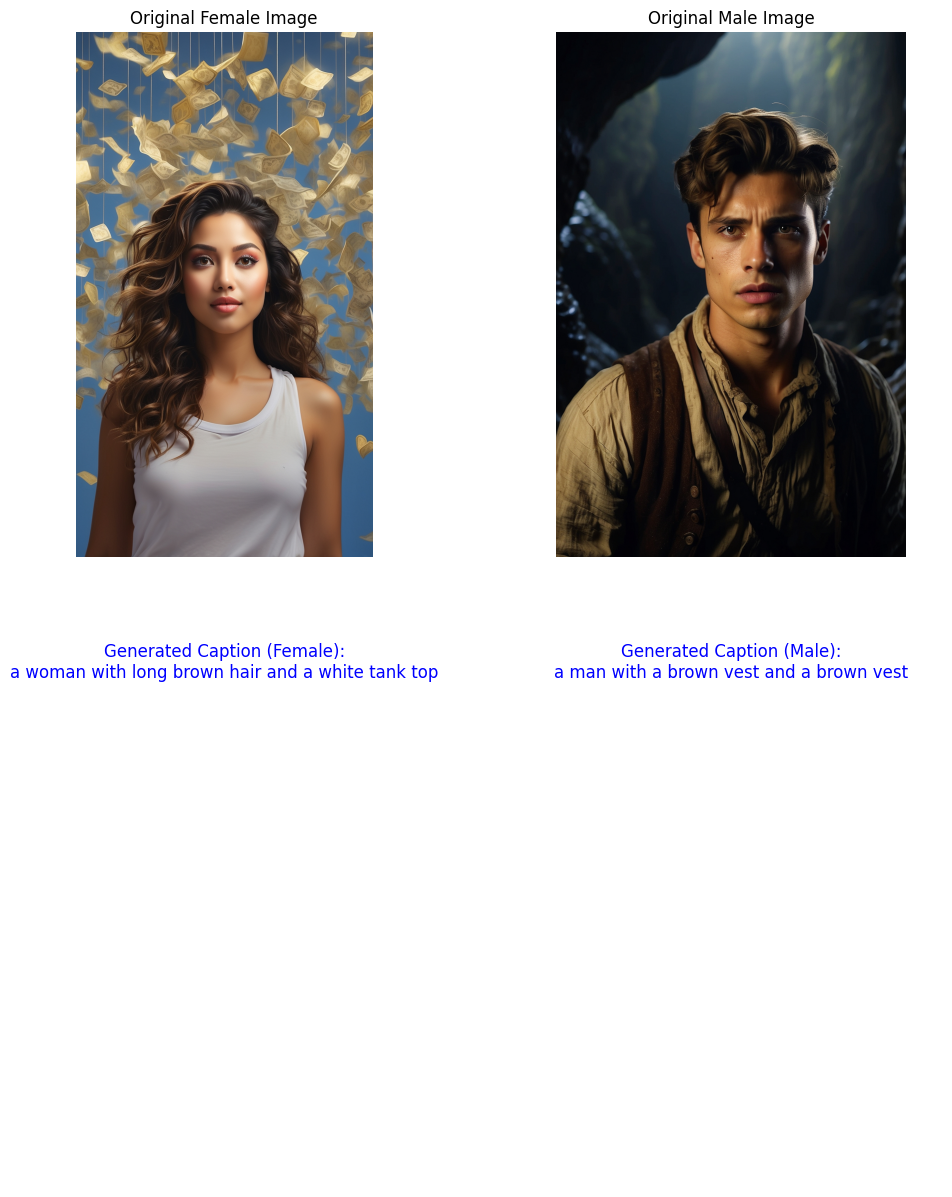

In [6]:
# Load the pre-trained image captioning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate image captions
def generate_captions(image_path):
    # Read and preprocess the image
    image = Image.open(image_path)
    image = processor(images=image, return_tensors="pt")

    # Generate captions using the model
    captions = model.generate(**image)
    caption_text = processor.decode(captions[0], skip_special_tokens=True)

    return caption_text

# Specify the paths to the directories containing images
female_directory = "/kaggle/input/ai-male-and-female/AI (Males & Females)/Female"
male_directory = "/kaggle/input/ai-male-and-female/AI (Males & Females)/Male"

# List all image files in the female directory
female_image_files = [file for file in os.listdir(female_directory) if file.endswith(".jpg")]

# Select a random female image from the dataset
selected_female_image = np.random.choice(female_image_files)

# Display the original female image
female_image_path = os.path.join(female_directory, selected_female_image)
original_female_image = cv2.imread(female_image_path)

# Generate captions for the female image
caption_female = generate_captions(female_image_path)

# List all image files in the male directory
male_image_files = [file for file in os.listdir(male_directory) if file.endswith(".jpg")]

# Select a random male image from the dataset
selected_male_image = np.random.choice(male_image_files)

# Display the original male image
male_image_path = os.path.join(male_directory, selected_male_image)
original_male_image = cv2.imread(male_image_path)

# Generate captions for the male image
caption_male = generate_captions(male_image_path)

# Display images side by side with generated captions below
fig, axs = plt.subplots(2, 2, figsize=(12, 15))

# Display the original female image
axs[0, 0].imshow(cv2.cvtColor(original_female_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Female Image')
axs[0, 0].axis('off')

# Display the generated caption for the female image
axs[1, 0].text(0.5, 1, f'Generated Caption (Female):\n{caption_female}', ha='center', va='center', fontsize=12, color='blue')
axs[1, 0].axis('off')

# Display the original male image
axs[0, 1].imshow(cv2.cvtColor(original_male_image, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Original Male Image')
axs[0, 1].axis('off')

# Display the generated caption for the male image
axs[1, 1].text(0.5, 1, f'Generated Caption (Male):\n{caption_male}', ha='center', va='center', fontsize=12, color='blue')
axs[1, 1].axis('off')

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.2)

plt.show()